<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Coleta de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Web Crawling;</li>
  <li>Web Scraping;</li>
  <li>Web API.</li>
</ol>

---

# **Exercícios**

## 1\. Filmes populares do IMDB

O [IMDB](https://www.imdb.com/) é um famoso site de `reviews` de filmes e seriados. Uma das páginas mais acessadas do website é o ranking de filmes mais bem votados. Neste exercício, vamos extrair informações deste website:

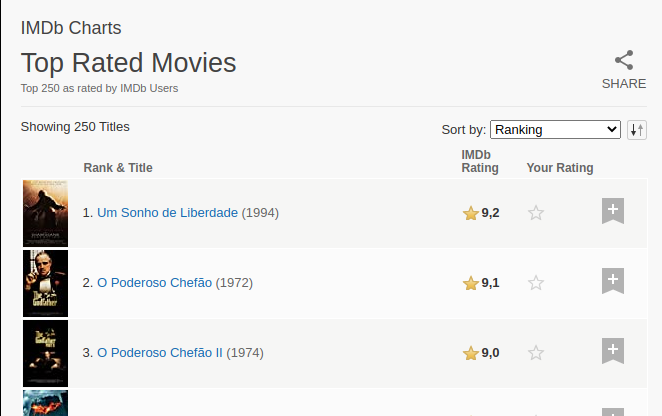

### **1.1. Arquivo Robots.txt**

Utilize o pacote Python `requests` para fazer o download do conteúdo do arquivo `robots.txt` do site do IMDB e salve numa variável chamada `robots`, este é o link:

```
https://www.imdb.com/robots.txt
```

Com o conteúdo na variável `robots`, verifique se a palavra `top` ou `charts` está presente no conteúdo do texto. Se sim, imprima `True`, senão imprima `False`.

In [1]:
# solução do exercício 1.1

import requests
from requests.exceptions import HTTPError

robots= None
URL= 'https://www.imdb.com/robots.txt'

try:
  resposta = requests.get(URL)
  resposta.raise_for_status()
  robots = resposta.text

except HTTPError as http_err:
  print(exc)
else:
  conteudo = resposta.text

if 'top' in robots or 'charts' in robots:
        print(True)
else:
        print(False)

False


**Dica**: Você pode colar o endereço do arquivo robots.txt no seu navegador para visualizar o conteúdo do arquivo.

### **1.2. Crawling & Scraping**

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 filmes mais populares do IMDB (titulo, ano e nota), este é o link:

```
https://www.imdb.com/chart/top/
```

Escreva os dados extraídos no arquivo csv `imdb.csv` separado por `;` no seguinte formato:

```
ranking;titulo;ano;nota
1;The Shawshank Redemption;1994;9.2
2;The Godfather;1972;9.1
3;The Godfather: Part II;1974;9.0
```

In [2]:
import requests
from requests.exceptions import HTTPError

URL = 'https://www.imdb.com/chart/top/'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
                  '(KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

try:
    response = requests.get(URL, headers=headers)
    response.raise_for_status()

    conteudo = response.content
    
except HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')

except Exception as err:
    print(f'Other error occurred: {err}')

In [3]:
# b) Utilize o pacote beautifulsoup4 para carregar o HTML da variavel conteudo na variavel pagina
from bs4 import BeautifulSoup
pagina = BeautifulSoup(conteudo, 'html.parser')


In [4]:
# c) Utilize o código abaixo para iterar nas linhas e colunas da tabela e preencher a variavel conteudo_extraido

conteudo_extraido = []

tabela = pagina.find('div', {'data-testid': 'chart-layout-main-column'})
filmes = tabela.find('ul')

for filme in filmes.find_all('li'):

    conteudo_extraido.append(filme.get_text(';').strip().split(';'))

print(conteudo_extraido)

[['1. Um Sonho de Liberdade', '1994', '2h 22m', '16', '9.3', '\xa0(', '2.9M', ')', 'Rate'], ['2. O Poderoso Chefão', '1972', '2h 55m', '14', '9.2', '\xa0(', '2M', ')', 'Rate'], ['3. Batman: O Cavaleiro das Trevas', '2008', '2h 32m', '12', '9.0', '\xa0(', '2.9M', ')', 'Rate'], ['4. O Poderoso Chefão II', '1974', '3h 22m', '14', '9.0', '\xa0(', '1.4M', ')', 'Rate'], ['5. 12 Homens e uma Sentença', '1957', '1h 36m', 'Livre', '9.0', '\xa0(', '879K', ')', 'Rate'], ['6. A Lista de Schindler', '1993', '3h 15m', '14', '9.0', '\xa0(', '1.5M', ')', 'Rate'], ['7. O Senhor dos Anéis: O Retorno do Rei', '2003', '3h 21m', '14', '9.0', '\xa0(', '2M', ')', 'Rate'], ['8. Pulp Fiction: Tempo de Violência', '1994', '2h 34m', '18', '8.9', '\xa0(', '2.2M', ')', 'Rate'], ['9. O Senhor dos Anéis: A Sociedade do Anel', '2001', '2h 58m', '12', '8.9', '\xa0(', '2M', ')', 'Rate'], ['10. Três Homens em Conflito', '1966', '2h 41m', '14', '8.8', '\xa0(', '821K', ')', 'Rate'], ['11. Forrest Gump: O Contador de Histó

**Dica**: O código na letra c já extrai o conteúdo das linhas na lista `textos_coluna`, basta que você extraia o conteúdo de interesse dela. Como exemplo:

```python
['1. Um Sonho de Liberdade', '1994', '2h 22m', '16', '9.3', '\xa0(', '2.9M', ')', 'Rate']
['2. O Poderoso Chefão', '1972', '2h 55m', '14', '9.2', '\xa0(', '2M', ')', 'Rate']
['3. Batman: O Cavaleiro das Trevas', '2008', '2h 32m', '12', '9.0', '\xa0(', '2.9M', ')', 'Rate']
['4. O Poderoso Chefão II', '1974', '3h 22m', '14', '9.0', '\xa0(', '1.4M', ')', 'Rate']
['5. 12 Homens e uma Sentença', '1957', '1h 36m', 'Livre', '9.0', '\xa0(', '868K', ')', 'Rate']
```

In [5]:
# d) Escreva o arquivo imdb.csv com o conteudo da variavel conteudo_extraido
import csv
dados_filmes = []
cabecalho = ["Posição", "Título", "Ano", "Nota"]

for i, filme in enumerate(conteudo_extraido[:10], start=1):
  posicao = filme[0].split('.')[0]
  titulo = filme[0].split('.')[1].strip()
  ano = filme[1]
  nota = filme[4]

  dados_filmes.append([posicao, titulo, ano, nota])


with open("imdb.csv", "w", newline="", encoding="utf-8") as arquivo_csv:
    escritor_csv = csv.writer(arquivo_csv)
    escritor_csv.writerow(cabecalho)
    escritor_csv.writerows(dados_filmes)

---

## 2\. Bônus: Projeto em destaque do GitHub

**Nota**: Este exercício não é obrigatório.

O [GitHub](https://github.com/) é o maior repositória de código aberto na internet. Nele, você pode encontrar o código fonte de diversos projetos, alguns inclusive utilizamos em nossas aulas, como o [Pandas](https://github.com/pandas-dev/pandas). O GitHub apresenta uma página de projetos em destaque, que são os projetos que estão recebendo muita atenção da comunidade:

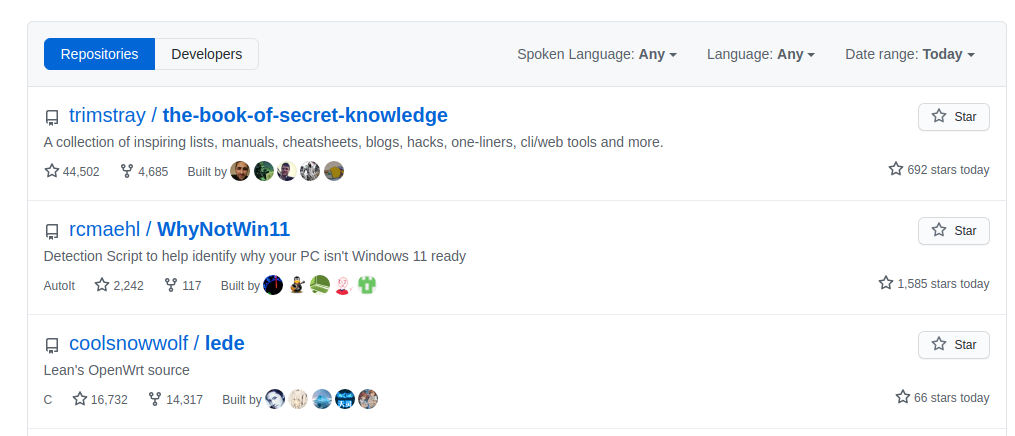

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 projetos mais populares do GitHub, este é o link:

```
https://github.com/trending
```

Escreva os dados extraídos no arquivo csv `github.csv` separado por `;` no seguinte formato:

```
ranking;project;language;stars;stars_today;forks
1;the-book-of-secret-knowledge;;44502;692;4685
2;whynotwin11;autoit;2242;1585;117
3;lede;c;16732;66;14317
```

**Nota**: Confira o arquivo `robots.txt` do website.

In [6]:
# URL da página Trending do GitHub
url = "https://github.com/trending"

# Enviar requisição para a URL
response = requests.get(url)

# Analisar o conteúdo HTML da página
soup = BeautifulSoup(response.content, 'html.parser')

# Encontrar todos os projetos listados na página
projects = soup.find_all('article', class_='Box-row') #article e box row é onde estão as informações dos projetos

# Lista para armazenar os dados dos projetos
projects_data = []

# Iterar sobre os primeiros 10 projetos
for idx, project in enumerate(projects[:10], start=1):
    # Extrair informações do projeto com verificações de segurança
    project_name_tag = project.find('h2', class_='h3 lh-condensed')
    project_name = project_name_tag.text.strip().replace('\n', '').replace(' ', '') if project_name_tag else 'N/A'

    language_tag = project.find('span', itemprop='programmingLanguage')
    language = language_tag.text.strip() if language_tag else 'N/A'

    stars_tag = project.find('a', class_='Link--muted d-inline-block mr-3')
    stars = stars_tag.text.strip().replace(',', '') if stars_tag else 'N/A'

    forks_tag = project.find_all('a', class_='Link--muted d-inline-block mr-3')[1] if len(project.find_all('a', class_='Link--muted d-inline-block mr-3')) > 1 else None
    forks = forks_tag.text.strip().replace(',', '') if forks_tag else 'N/A'

    stars_today_tag = project.find('span', class_='d-inline-block float-sm-right')
    stars_today = stars_today_tag.text.strip().split(' ')[0].replace(',', '') if stars_today_tag else 'N/A'

    # Adicionar os dados do projeto à lista
    projects_data.append([idx, project_name, language, stars, stars_today, forks])

# Nome do arquivo CSV
csv_file = 'github.csv'

# Escrever os dados no arquivo CSV
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerow(['ranking', 'project', 'language', 'stars', 'stars_today', 'forks'])
    writer.writerows(projects_data)

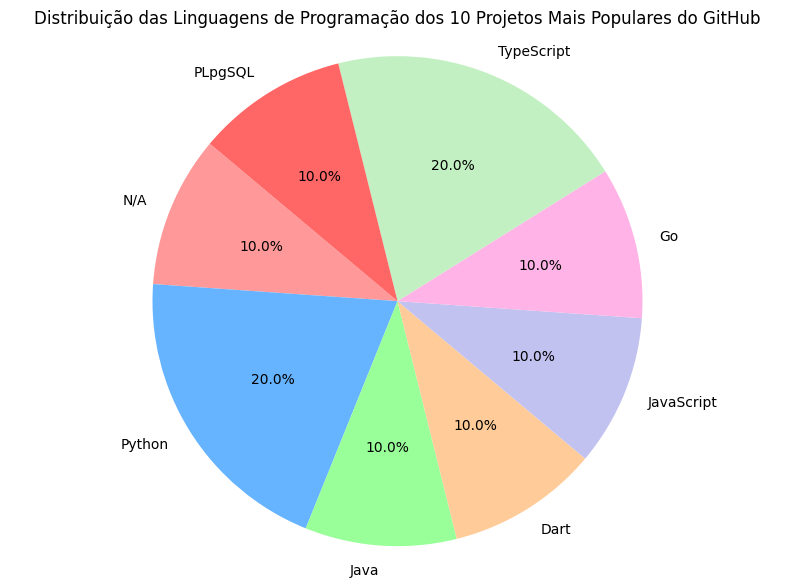

In [7]:
import matplotlib.pyplot as plt

languages = [project[2] for project in projects_data]
language_counts = {language: languages.count(language) for language in set(languages)}

# Definir uma lista de cores para o gráfico de pizza
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ff6666','#c2f0c2','#c2f0c2']

# Criar o gráfico de pizza
plt.figure(figsize=(10, 7))
plt.pie(language_counts.values(), labels=language_counts.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribuição das Linguagens de Programação dos 10 Projetos Mais Populares do GitHub')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()